In [1]:
from math import sqrt

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy.linalg import inv


In [2]:
def inital_W(C):
    '''finds the initial weight matrix W, given a covariance matrix C'''
    ones = np.ones((len(C), 1))
    W = np.transpose(np.matmul(np.transpose(ones), inv(C)) /
                     np.matmul((np.matmul(np.transpose(ones), inv(C))),    ones))
    return W


def getMin_μσ2(μ, C, show=True):
    '''gets the minimum value of μ and σ**2 for a given expected return matrix μ\n
    and a covariance matrix C, if show is true function returns a string'''
    W = inital_W(C)
    σ2_min = np.matmul(np.matmul(np.transpose(W), C), W)
    μ_min = np.matmul(np.transpose(W), μ)
    if show:
        return f'μ_min  = {μ_min[0][0]}  \nσ2_min = { σ2_min[0][0]}'
    return μ_min[0][0], σ2_min[0][0]


def get_μσ2(μ, C, W, show=True):
    '''gets the value of μ and σ**2, for a given expected return matrix μ\n and a covariance matrix C, and a weight matrix W.\nif show is true function returns a string'''
    σ2 = np.matmul(np.matmul(np.transpose(W), C), W)
    μ = np.matmul(np.transpose(W), μ)
    if show:
        return f'μ  = {μ[0][0]}  \n σ2 = { σ2[0][0]}'
    return μ[0][0], σ2[0][0]


def Markowitz(muval, μ, C):
    '''Solve the Markowitz problem given a value specific value of return- muval
    the excpected return vector (μ) and the covariance matrix (C)'''
    if muval == 0:
        muval = getMin_μσ2(μ, C, False)[0]
    # set up vector for all the weights on the Right Hand Side (RHS)
    RHS = np.array([[0] for i in range(len(μ))])
    # adds the value of μ and 1 to the RHS vector (forming the last 2 constraints)
    RHS = np.vstack((RHS, np.array([[muval], [1]])))
    # the following gets to the covariance matrix and adds the labmda variable coefficients
    # to create the Left Hand Side of the equation
    LHS = np.append(C, -μ, axis=1)
    LHS = np.append(LHS, -np.ones((len(C), 1)), axis=1)
    LHS = np.vstack((LHS, np.append(μ, [0, 0])))
    LHS = np.vstack((LHS, np.append(np.ones(len(C)), [0, 0])))
    # this line solves it and returns (ONLY) the values of the weights
    return (np.matmul(inv(LHS), RHS)[:len(μ)])


In [3]:

def plotEfficientFrontier(μ, C, lb=-1, ub=2, show=True):
    varlist = []
    mewplotlist = []
    colour = []
    for i in range(lb*1000, ub*1000):  # change this range to what you want to show
        i /= 1000
        W = Markowitz(i, μ, C)
        if i < 0:
            colour.append('red')
        elif i > 0 and i <= 1:
            colour.append('green')
        elif i > 1:
            colour.append('blue')
        else:
            colour.append('none')
        mewplot = np.matmul(np.transpose(W), μ)[0][0]
        sig2 = sqrt(np.matmul(np.matmul(np.transpose(W), C), (W))[0][0])
        mewplotlist.append(mewplot)
        varlist.append(sig2)
    if show:
        plt.title('Efficient Frontier')
        plt.xlabel('σ (volatility)')
        plt.ylabel('μ (return)')
        plt.scatter(varlist, mewplotlist, c=colour, s=2, )
        plt.show()
        return
    return list(zip(varlist, mewplotlist))
# plotEfficientFrontier(μ, C)


In [4]:
def MAT(x):
    rows = x.split("\n")
    array = []
    for row in rows:
        numbers = row.split(" ")
        row = []
        for number in numbers:
            try:
                row.append(float(number))
            except:
                pass
        array.append(row)
    array = np.array(array)
    return array


In [5]:

DF = pd.read_csv('Assignment3-data.csv', delimiter=';')
AR = np.array(DF)
DF


,Date,BTC,ETH,DOGE,LTC,HEX
0,2021-02-15,48696.535156,1804.676758,0.062568,214.324997,0.010862
1,2021-02-16,47944.457031,1778.945557,0.056488,207.610443,0.010084
2,2021-02-17,49207.277344,1781.350098,0.053522,210.569031,0.010415
3,2021-02-18,52140.972656,1848.206299,0.049363,236.949249,0.010655
4,2021-02-19,51675.980469,1938.859863,0.059434,226.899292,0.009991
...,...,...,...,...,...,...
361,2022-02-11,43571.128906,3077.413086,0.151895,135.092850,0.209780
362,2022-02-12,42412.300781,2927.386475,0.144856,126.012909,0.203888
363,2022-02-13,42236.566406,2916.789551,0.144379,126.670776,0.205782
364,2022-02-14,42157.398438,2880.187744,0.148869,126.134789,0.200421


In [6]:
DF_R = pd.DataFrame()
for col in DF.columns[1:]:
    # DF_R.loc[0, 'r_'+col] = 0 # taken out because you only use sum of 1 to T
    for i in range(1, len(DF[col])):
        try:
            DF_R.loc[i, 'r_'+col] = ((DF.loc[i, col] -
                                     DF.loc[i-1, col]) / DF.loc[i-1, col])
        except IndexError:
            print(f'error in {i}, in {col}')
R_array = np.array(DF_R)


In [7]:
# C = np.array(pd.DataFrame.C(DF_R))*365
μ = np.array([[i] for i in np.sum(R_array, axis=0)])
C = np.cov(R_array, rowvar=False)*365
C, μ


(array([[0.55033849, 0.59493388, 0.59173626, 0.66730587, 0.24340606],
        [0.59493388, 0.99029242, 0.8512951 , 0.90411423, 0.36261754],
        [0.59173626, 0.8512951 , 3.58859907, 1.06839053, 0.48837822],
        [0.66730587, 0.90411423, 1.06839053, 1.25318217, 0.4335293 ],
        [0.24340606, 0.36261754, 0.48837822, 0.4335293 , 2.42731245]]),
 array([[0.14188718],
        [0.98544934],
        [2.39704476],
        [0.10635377],
        [4.08272956]]))

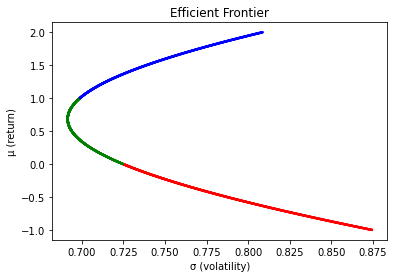

In [8]:
plotEfficientFrontier(μ, C)


In [9]:
μ


array([[0.14188718],
       [0.98544934],
       [2.39704476],
       [0.10635377],
       [4.08272956]])

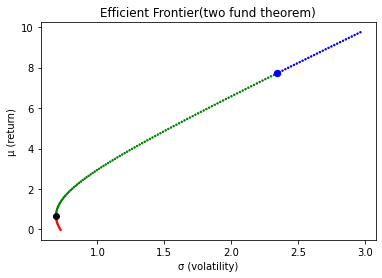

In [10]:
def two_fund_theorem1(μ, C, r, row=0.3):
    ones = np.ones((len(C), 1))
    W1 = inital_W(C)
    W2 = np.transpose(np.matmul(np.transpose(μ-r*ones), inv(C)) /
                      np.matmul((np.matmul(np.transpose(μ-r*ones), inv(C))), ones))
    μ1, σ21 = get_μσ2(μ, C, W1, False)
    μ2, σ22 = get_μσ2(μ, C, W2, False)
    if μ1 < μ2 and σ21 < σ22:
        μ1, σ21, μ2, σ22 = μ2, σ22, μ1, σ21
    μpoints, σpoints, colours = [], [], []
    for w in range(-10, 130):
        w /= 100
        if w < 0:
            colours.append('red')
        elif w > 0 and w < 1:
            colours.append('green')
        elif w > 1:
            colours.append('blue')
        else:
            colours.append('black')
        σv = sqrt(((w**2)*(σ21)) + (2*w*(1-w)*sqrt(σ21)
                  * sqrt(σ22) * row) + (((1-w)**2)*(σ22)))
        μv = w*μ1+(1-w)*μ2
        μpoints.append(μv)
        σpoints.append(σv)

    plt.title('Efficient Frontier(two fund theorem)')
    plt.xlabel('σ (volatility)')
    plt.ylabel('μ (return)')
    plt.scatter(σpoints, μpoints, c=colours, s=2,)
    plt.scatter(sqrt(σ21), μ1, c='blue', s=40)
    plt.scatter(sqrt(σ22), μ2, c='black')
    plt.show()


r = 1/100
two_fund_theorem1(μ, C, r)
# plotEfficientFrontier(μ, C)


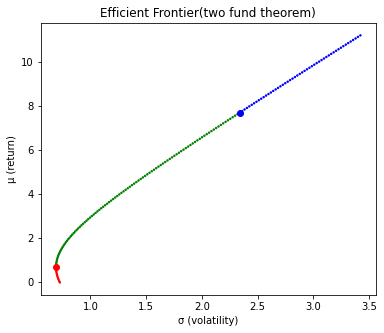

In [11]:
def two_fund_theorem2(μ1, σ1, μ2, σ2, row=0, show=True, fig=None):
    if not fig:
        fig = plt.figure(figsize=(6, 5))
    if μ1 < μ2 and σ1 < σ2:
        μ1, σ1, μ2, σ2 = μ2, σ2, μ1, σ1
    μpoints, σpoints, colours = [], [], []
    for w in range(-10, 151):
        w /= 100
        if w < 0:
            colours.append('red')
        elif w > 0 and w <= 1:
            colours.append('green')
        elif w > 1:
            colours.append('blue')
        else:
            colours.append('none')
        μv = w*μ1 + (1-w)*μ2
        σv = sqrt((w**2*σ1**2)+(2*w*(1-w)*σ1*σ2*row) + ((1-w)**2*σ2**2))
        μpoints.append(μv)
        σpoints.append(σv)
    # (sσM; (1+s)r f +sμM)
    if show:
        axarr = fig.add_subplot(1, 1, 1)
        plt.title('Efficient Frontier(two fund theorem)')
        plt.xlabel('σ (volatility)')
        plt.ylabel('μ (return)')
        plt.scatter(σpoints, μpoints, c=colours, s=2,)
        plt.scatter((σ1), μ1,  c='b')
        plt.scatter((σ2), μ2,  c='r')
        return
    return fig


W1 = (inital_W(C))
ones = np.ones((len(C), 1))
W2 = np.transpose(np.matmul(np.transpose(μ-r*ones), inv(C)) /
                  np.matmul((np.matmul(np.transpose(μ-r*ones), inv(C))),    ones))

μ1, σ1 = get_μσ2(μ, C, W1, False)
μ2, σ2 = get_μσ2(μ, C, W2, False)
two_fund_theorem2(μ1, sqrt(σ1), μ2, sqrt(σ2), 0.3)


In [12]:
C = np.array([
    [0.2, 0.1, 0.1],
    [0.1, 0.3, 0.1],
    [0.1, 0.1, 0.4]
])
μt = np.array([[0.1, 0.2, 0.3]])
μ = np.transpose(μt)
# r = 1/100
# two_fund_theorem1(μ, C, r)
# plotEfficientFrontier(μ, C)


0.273


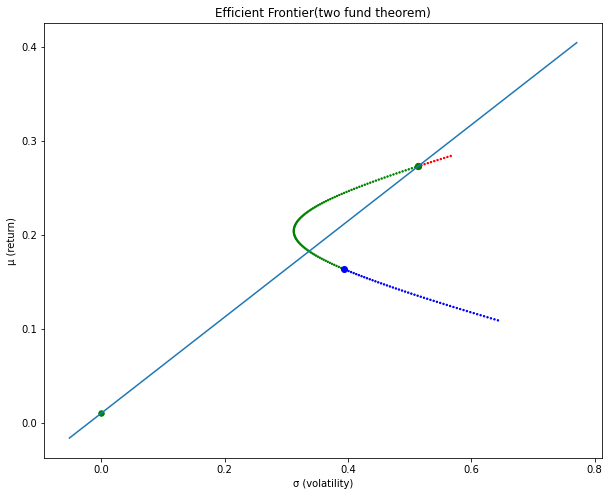

In [13]:
def OneFundTheorem(μ, C, rf, row):
    μPpoints, σPpoints = [], []
    μpoints, σpoints, colours = [], [], []
    ones = np.ones((len(C), 1))
    W = np.transpose(np.matmul(np.transpose(μ-rf*ones), inv(C)) /
                     np.matmul((np.matmul(np.transpose(μ-rf*ones), inv(C))),    ones))

    μp1, σ2p1 = get_μσ2(μ, C, W, False)
    μ_min, σ_min = getMin_μσ2(μ, C, False)
    σp1 = sqrt(σ2p1)
    σ_min = sqrt(σ_min)
    dic = {}
    for (σc, μc) in plotEfficientFrontier(μ, C, show=False):
        dic[((μc-rf)/σc)] = (μc)
    try:
        W = Markowitz(dic[max(dic)], μ, C)
    except:
        W = Markowitz(max(dic), μ, C)
    μp1, σ2p1 = get_μσ2(μ, C, W, False)
    σp1 = sqrt(σ2p1)
    # μp1 = max(dic)
    print(μp1)
    for s in range(-10, 101):
        s /= 100
        μp = s*rf+(1-s)*μp1
        σp = (1-s)*σp1
        μPpoints.append(μp)
        σPpoints.append(σp)
    for w in range(-10, 151):
        w /= 100
        if w < 0:
            colours.append('red')
        elif w > 0 and w <= 1:
            colours.append('green')
        elif w > 1:
            colours.append('blue')
        else:
            colours.append('none')
        μv = w*μ_min + (1-w)*μp1
        σv = sqrt((w**2*σ_min**2)+(2*w*(1-w)*σ_min*σp1*row) + ((1-w)**2*σp1**2))
        μpoints.append(μv)
        σpoints.append(σv)
    lineμ =[]
    lineσ =[]
    σmarket = σp1
    μmarket = μp1
    for s in range(-10, 151):
        s /= 100
        lineσ.append(s*σmarket)
        lineμ.append((1-s)*rf+s*μmarket)

    fig = plt.figure(figsize=(10, 8))
    plt.scatter((σp1), μp1,  c='red', s=40)
    plt.plot(lineσ, lineμ)
    plt.title('Efficient Frontier(two fund theorem)')
    plt.xlabel('σ (volatility)')
    plt.ylabel('μ (return)')
    plt.scatter(σpoints, μpoints, c=colours, s=2,)
    plt.scatter((σ_min), μ_min,  c='b')
    plt.scatter((σp1), μp1,  c='green', s=30)
    plt.scatter((0), rf,  c='green', s=30)
    # plt.plot(σPpoints, μPpoints)
    plt.show()


OneFundTheorem(μ, C, 1/100, 0)


# part 4 of task 2

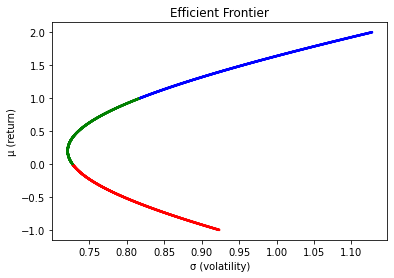

1.999


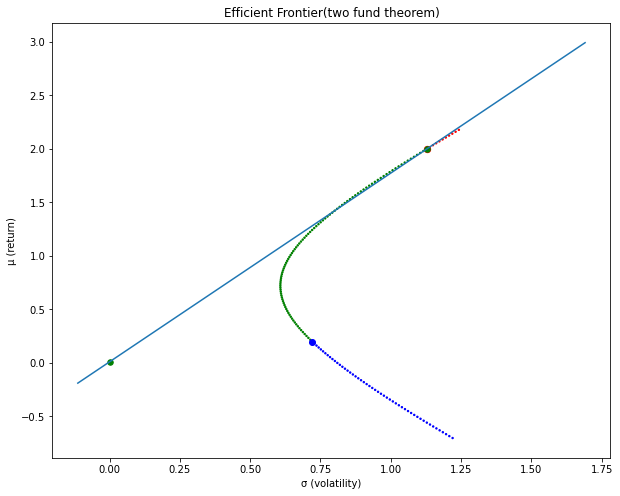

In [14]:
R_array2=R_array[:,:4]
μ2 = np.array([[i] for i in np.sum(R_array2, axis=0)])
C2 = np.cov(R_array2, rowvar=False)*365
μ2, C2

plotEfficientFrontier(μ2, C2)

# two_fund_theorem1(μ2, C2, 1/100)

# two_fund_theorem2(μ1, sqrt(σ1), μ2, sqrt(σ2), 0.3)


OneFundTheorem(μ2, C2, 1/100, 0)

